## This notebook is for testing the mediapie hand gesture recognition model

In [84]:
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles 
mp_hands = mp.solutions.hands
model = mp_hands.Hands(model_complexity=0, min_detection_confidence=0.5, min_tracking_confidence= 0.5)

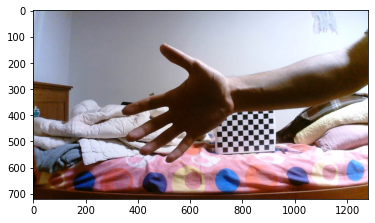

In [95]:
import cv2 as cv2
import matplotlib.pyplot as plt
hand_image = cv2.imread("hand2.jpg")
hand_image = cv2.cvtColor(hand_image, cv2.COLOR_BGR2RGB)
plt.imshow(hand_image)


In [91]:
hand_image.shape

(720, 1280, 3)

In [92]:
result = model.process(hand_image)

In [99]:
result.multi_hand_landmarks[0].landmark[0]

x: 0.5804795026779175
y: 0.43983015418052673
z: 6.72892408459802e-09

In [93]:
result.multi_hand_landmarks[0]

landmark {
  x: 0.5804795026779175
  y: 0.43983015418052673
  z: 6.72892408459802e-09
}
landmark {
  x: 0.5358912944793701
  y: 0.36242973804473877
  z: -0.03422999009490013
}
landmark {
  x: 0.4790498614311218
  y: 0.30943113565444946
  z: -0.060847826302051544
}
landmark {
  x: 0.4318317174911499
  y: 0.26801443099975586
  z: -0.08604373037815094
}
landmark {
  x: 0.3976201117038727
  y: 0.21938297152519226
  z: -0.11350295692682266
}
landmark {
  x: 0.41737180948257446
  y: 0.474710077047348
  z: -0.048960741609334946
}
landmark {
  x: 0.35387685894966125
  y: 0.5039051175117493
  z: -0.07687922567129135
}
landmark {
  x: 0.3134792149066925
  y: 0.5264304876327515
  z: -0.0984501987695694
}
landmark {
  x: 0.2802841067314148
  y: 0.5477162003517151
  z: -0.11397036164999008
}
landmark {
  x: 0.4296037554740906
  y: 0.5501564741134644
  z: -0.051721107214689255
}
landmark {
  x: 0.3639475107192993
  y: 0.6049517393112183
  z: -0.07790905982255936
}
landmark {
  x: 0.32242563366889954

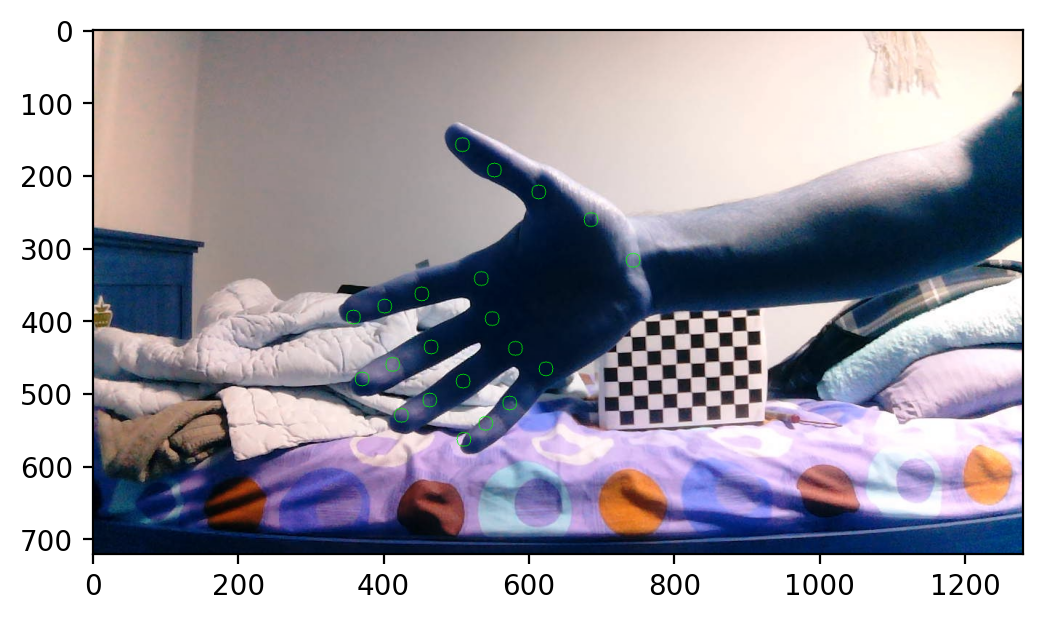

In [94]:
img = hand_image.copy()
main_hand = result.multi_hand_landmarks[0]
h = hand_image.shape[0]
w = hand_image.shape[1]
for i in range(21):
    lm = main_hand.landmark[i]
    point = (int(lm.x * w), int(lm.y * h))
    cv2.circle(img, point, 10, (0, 255, 0), 1)
plt.figure(dpi=200)
plt.imshow(img)

In [66]:
connections = []
for i in range(21):
    connections.append((i, i+1))

connections

[(0, 1),
 (1, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (9, 10),
 (10, 11),
 (11, 12),
 (12, 13),
 (13, 14),
 (14, 15),
 (15, 16),
 (16, 17),
 (17, 18),
 (18, 19),
 (19, 20),
 (20, 21)]

In [70]:
connections = [(0, 1), (0, 5), (0, 17), (5, 9), (9, 13), (13, 17), (1, 2), (2, 3), (3, 4), (5, 6), (6, 7), (7, 8), (9, 10), (10, 11), (11, 12), (13, 14), (14, 15), (15, 16), (17, 18), (18, 19), (19, 20)]
len(connections)

21

In [71]:
img = hand_image.copy()
if not result.multi_hand_landmarks:
    print("no hands found")
main_hand = result.multi_hand_landmarks[0]
h = hand_image.shape[0]
w = hand_image.shape[1]
for landmark in main_hand.landmark:
    point = (landmark.x * w, landmark.y * h)
    cv2.circle(img, point, 5, (255, 0, 0), 1)
plt.imshow(img)

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'circle'
> Overload resolution failed:
>  - Can't parse 'center'. Sequence item with index 0 has a wrong type
>  - Can't parse 'center'. Sequence item with index 0 has a wrong type


In [83]:
import datetime as dt

t = dt.datetime.now().second
t

45